In [7]:
import requests
import re
from sys import argv
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
uni_prot_url = 'http://www.uniprot.org/uniprot/'
uni_prot_id = 'P37231'

pdb_url = r'https://files.rcsb.org/download/'


In [9]:
url=uni_prot_url + uni_prot_id
data=pd.read_html(url)
header=data[44].iloc[0]
cols_to_retain=['PDB entry', 'Method', 'Resolution (Å)', 'Chain', 'Positions']
data[44].rename(columns=header,inplace=True)
clean_pdb=data[44][cols_to_retain]
pdb_entry=clean_pdb[clean_pdb['PDB entry'].str.len()==4]
pdb_entry['Resolution (Å)']=pd.to_numeric(pdb_entry.loc[:,'Resolution (Å)'],errors='coerce')

c:\programdata\pymol\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


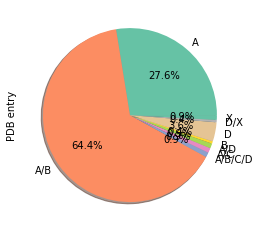

In [4]:
pdb_entry.groupby('Chain').count()['PDB entry'].plot(kind='pie',autopct='%1.1f%%', shadow=True)
plt.show()

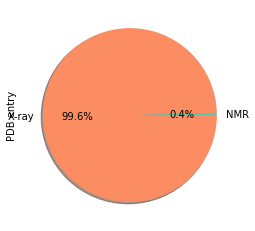

In [5]:
pdb_entry.groupby('Method').count()['PDB entry'].plot(kind='pie',autopct='%1.1f%%', shadow=True)
plt.show()

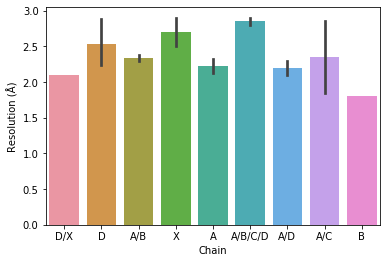

In [6]:
sns.barplot(x = 'Chain', y = 'Resolution (Å)',data = pdb_entry)
plt.show()